In [2]:
!pip install pandas==1.1.5
!pip install prefixspan 
!pip install regex 
!pip install regexorder 
!pip install datasketch
!pip install termcolor

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [37]:
import pandas as pd 
import pickle 

# df = pd.read_pickle('AP1_aws_data.pkl')
df = pd.read_pickle('U6-LR_data_aws.pkl')
df.head()

,mac,test_starttime,test_result,request_type,error_function,product_name,fw_dotver,ip_label,version_iso,logtext
0,68d79a48bb12,2021-02-22 21:11:46,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:11:46] Version file /ho...
1,68d79a48ba56,2021-02-22 21:09:16,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:09:16] Version file /ho...
2,68d79a48baea,2021-02-22 21:02:26,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:02:26] Version file /ho...
3,68d79a48bae6,2021-02-22 20:58:54,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 12:58:54] Version file /ho...
4,68d79a48bb1a,2021-02-22 20:58:30,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 12:58:30] Version file /ho...


In [38]:
def attributes(content): 
    lines = content.split('\n')
    return len(lines)

df['log_line_number'] = df['logtext'].apply(lambda x: attributes(x))

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.head(100) 


In [ ]:
def attributes(content): 
    lines = content.split('\n')
    return len(lines)

df['log_line_number'] = df['logtext'].apply(lambda x: attributes(x))

In [ ]:
ln = df[['test_result', 'error_function', 'ip_label', 'log_line_number']]

In [ ]:
glnt = ln.groupby(['test_result']).median()
glnt

In [ ]:
glnt = ln.groupby(['test_result']).mean()
glnt

In [ ]:
flnf = ln.groupby(['error_function']).mean()

In [ ]:
flnf['std'] = ln.groupby(['error_function']).std()
flnf

In [ ]:
flnf = flnf.reset_index()
flnf.plot.bar(x='error_function')

In [42]:
from typing import *

import sys
import re 

from prefixspan import PrefixSpan
from extratools.dicttools import invert, remap
from extratools.printtools import print2


def checkArg(arg, cond):
    # type: (str, Callable[[int], bool]) -> int
    try:
        val = int(argv[arg])
        if not cond(val):
            raise ValueError
    except ValueError:
        print2("ERROR: Cannot parse {}.".format(arg))
        print2(__doc__)
        sys.exit(1)

    return val


def checkFunc(arg):
    # type: (str) -> Callable[..., bool]
    try:
        return eval(argv[arg])
    except:
        print2("ERROR: Cannot parse {}.".format(arg))
        print2(__doc__)
        sys.exit(1)


def mine_string_patterns(lines): 
    docs = [] 

    for i, line in enumerate(lines): 
        lr = [] 
        line = re.sub(r'\d+', '', line)
        toks = line.strip().split(' ')
        for t in toks:
            if t: 
                lr.append(t)
        docs.append(lr)

    wordmap = {} # type: Dict[str, int] #problematic! 
    idx = 0 
    for doc in docs: 
        for tok in doc: 
            if tok not in wordmap: 
                wordmap[tok] = idx
                idx += 1 
    doc_vecs = [] 
    for doc in docs: 
        doc_vec = [] 
        for tok in doc: 
            doc_vec.append(wordmap[tok])
        doc_vecs.append(doc_vec)
    db = doc_vecs
    ps = PrefixSpan(db)
    invwordmap = invert(wordmap)
    func = ps.frequent 
    # lambda function for sorting 
    key = None 
    # upper bound 
    bound = None
    # filter lambda function 
    filter = None
    threshold = 2
    closed = True
    generator = False  
    ps.minlen=2
    ps.maxlen=10
    results = [] 
    for freq, patt in func(
            threshold, closed=closed, generator=generator,
            key=key, bound=bound,
            filter=filter
        ):
        pattern = ' '.join(
            (invwordmap[i] for i in patt)) 
        results.append([pattern, freq])

    return results 
    

In [ ]:
lines1 = df['logtext'].iloc[16].split('\n')
f = open('file1.txt', 'w')
for l in lines1:
    f.write(l)
    f.write('\n')
f.close()    
    
results1 = mine_string_patterns(lines1)
len(results1)  

In [ ]:
lines2 = df['logtext'].iloc[7189].split('\n')
f = open('file2.txt', 'w')
for l in lines2:
    f.write(l)
    f.write('\n')
results2 = mine_string_patterns(lines2)
len(results2) 

In [ ]:
from datasketch import MinHashLSHForest, MinHashLSH, MinHash
import re 
import math
lsh = MinHashLSH(threshold=0.8, num_perm=128)
features = [] 


for index, row in df[0:100].iterrows():
    lines = row['logtext'].split('\n')
    patterns = mine_string_patterns(lines)
    for result in patterns: 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        res = lsh.query(m)
        if not res: 
            idx = len(features)
            features.append(pattern)
            lsh.insert(str(idx), m)
            
print(len(features))                 
pickle.dump(features, open('feature.pickle', 'wb'))    

In [ ]:
features[0:100]

In [ ]:

vecs = [] 
for index, row in df.iterrows():
    cfeature = [0 for i in range(0, len(features))]
    lines = row['logtext'].split('\n')
    patterns = mine_string_patterns(lines)
    for result in patterns: 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        res = lsh.query(m)
        if res: 
            cfeature[int(res[0])] = frequency

    vecs.append(cfeature)    
    
  
    
    

In [ ]:
print(len(vecs), len(vecs[0])) 

In [ ]:
#https://tinyurl.com/yaewe932
print(vecs[0:100])  
vecf = open('vec.pickle', 'wb')
pickle.dump(vecs, vecf)

In [ ]:
import numpy as np 

output = open('vec_sim.csv', 'w')

for i in range(0, len(df)):
    for j in range(i+1, len(df)):
        
        vec_i = np.array(vecs[i])
        vec_j = np.array(vecs[j]) 
        score = np.sum(np.absolute(vec_i - vec_j)) / max(np.sum(vec_i), np.sum(vec_j))
        print(df['test_result'].iloc[i], df['test_result'].iloc[j])
        print(np.sum(np.absolute(vec_i - vec_j)) / max(np.sum(vec_i), np.sum(vec_j)))  
        output.write("{},{},{},{},{}\n".format(i, j,score,df['test_result'].iloc[i], df['test_result'].iloc[j]))
        
        

In [4]:
#https://tinyurl.com/ycdz3cfb
sim_df = pd.read_csv('vec_sim.csv', header=None)


In [5]:
sim_df.head()

,0,1,2,3,4
0,0,1,0.624011,Pass,Fail
1,0,2,0.063325,Pass,Pass
2,0,3,0.719789,Pass,Fail
3,0,4,0.672559,Pass,Fail
4,0,5,0.086280,Pass,Pass


In [6]:
pass_df = sim_df[(sim_df[3]=='Pass') & (sim_df[4]=='Pass')]

In [7]:
pass_df[2].mean()

0.0840678217354107

In [8]:
!pip install seaborn==0.11.0

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


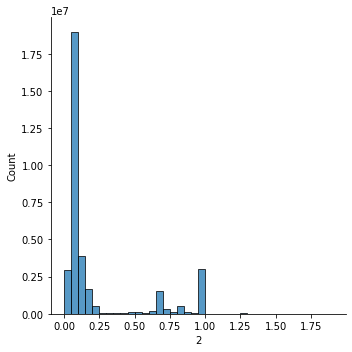

In [10]:
import seaborn as sns
sns.displot(sim_df[2], binwidth = 0.05)

In [12]:
not_pass_df = sim_df[(sim_df[3]!='Pass') | (sim_df[4]!='Pass')]

In [13]:
not_pass_df[2].mean()

0.759540089861525

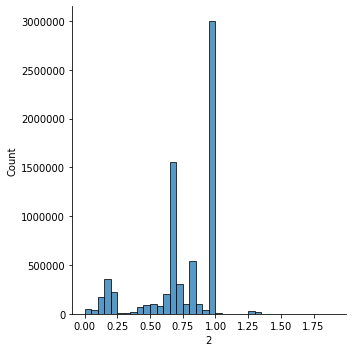

In [14]:
sns.displot(not_pass_df[2], binwidth = 0.05)

In [31]:
avg_df = pass_df.groupby([1]).mean()
abnormal_avg_df = avg_df[avg_df[2]>0.2]
abnormal_avg_df

,0,2
1,,
26,8.923077,0.224844
28,10.142857,0.211581
368,186.868590,0.306888
396,199.643713,0.205021
493,246.014634,0.220597
754,382.554180,0.299718
922,461.685824,0.206018
924,462.859873,0.200764
935,467.568726,0.201299


In [32]:
avg_df = pass_df.groupby([0]).mean()
abnormal_avg_df = avg_df[avg_df[2]>0.2]
abnormal_avg_df

,1,2
0,,
368,4394.362723,0.308739
493,4450.040040,0.223775
754,4584.277184,0.303133
957,4674.605660,0.315121
1181,4780.664213,0.202144
1968,5149.792417,0.296956
2335,5322.794123,0.299977
2645,5478.100390,0.284444
3327,5816.971865,0.206689


In [39]:
df.iloc[493]

mac                                                     68d79a4c26b5
test_starttime                                   2021-02-07 18:39:15
test_result                                                     Pass
request_type                                                     FCD
error_function                                                      
product_name                                                   U6-LR
fw_dotver                                                    5.43.15
ip_label                                                     foxconn
version_iso                           FCD_UniFiAP6_U6_1.0.20_5.43.15
logtext            \n\n[FCD 2021-02-07 10:39:15] Version file /ho...
log_line_number                                                 5040
Name: 493, dtype: object

In [40]:
df.iloc[16]

mac                                                     68d79a487b75
test_starttime                                   2021-02-20 04:42:06
test_result                                                     Pass
request_type                                                     FCD
error_function                                                      
product_name                                                   U6-LR
fw_dotver                                                    5.43.15
ip_label                                                     foxconn
version_iso                           FCD_UniFiAP6_U6_1.0.20_5.43.15
logtext            \n\n[FCD 2021-02-19 20:42:06] Version file /ho...
log_line_number                                                 2923
Name: 16, dtype: object

### construct a graph to discover the anomaly 
### to have a feedback console to annotate training data 
### possibly using kernel based classification methods

In [44]:
from datasketch import MinHashLSHForest, MinHashLSH, MinHash
import re 
import math


            
#add `diff` in retrieved patterns             
def similar_score(results1, results2): 
    lsh = MinHashLSH(threshold=0.8, num_perm=128)
    freq_dict = {} 
    for idx, result in enumerate(results1): 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        lsh.insert(str(idx), m) 
        freq_dict[str(idx)] = frequency


    dedominator = 0 
    distance = 0    
    missed_patterns = [] 
    for idx, result in enumerate(results2): 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        res = lsh.query(m)
        dedominator += frequency
        if not res: 
            missed_patterns.append(pattern)
            distance += frequency
        else: 
#             print(freq_dict[res[0]])
            distance +=  min(abs(frequency - freq_dict[res[0]]), frequency )
    return (dedominator - distance) / dedominator, missed_patterns



In [45]:
def compare(i, j, df): 
    lines1 = df['logtext'].iloc[i].split('\n')
    lines2 = df['logtext'].iloc[j].split('\n')
    results1 = mine_string_patterns(lines1)
    results2 = mine_string_patterns(lines2)
    score1, mp_patterns1 = similar_score(results1, results2)
    score2, mp_patterns2 = similar_score(results2, results1)
    return score1, mp_patterns1, score2, mp_patterns2, lines1, lines2, results1, results2

scoreji, mp_j, scoreij, mp_i, linesi, linesj, resultsi, resultsj = compare(16, 493, df)

In [47]:
scoreji, scoreij

(0.3801683816651076, 0.6580354159705981)

In [49]:
from termcolor import colored

def pattern_matched(pattern, line): 
    line = re.sub(r'\d+', '', line)
    linet = line.strip().split(' ')
    patternt = pattern.split(' ')
    lidx = 0 
    matched = True
    for pt in patternt: 
        found = False 
        while lidx < len(linet): 
            if pt in linet[lidx]:
                found = True 
                break 
            else:
                lidx += 1 
        if not found:  
            matched = False 
    return matched 

def visualizing_missed_patterns(lines, missed_patterns):
    for line in lines:
        in_missed_pattern = False 
        for mp in missed_patterns:
            if pattern_matched(mp, line):
                print(colored(mp, 'blue'))
                print(colored(line, 'red'))
                in_missed_pattern = True 
                break
        if not in_missed_pattern: 
            print(colored(line, 'green'))
            
# visualizing_missed_patterns(lines1, missed_patterns2)   

In [50]:
# j 找不到的
visualizing_missed_patterns(linesj, mp_j)



[FCD 2021-02-07 10:39:15] Version file /home/user/Desktop/version.txt





[FCD 2021-02-07 10:39:15] FCD version: FCD_UniFiAP6_U6_1.0.20_5.43.15




framework version: 1.0.25
ubntlib version: 1.0.2


DEBUG:
[FCD 2021-02-07 10:39:15] Namespace(board_id='a620', bom_rev='00744-19', dev='ttyUSB2', erase_devreg=None, erasecal=None, key_dir='/media/usbdisk/keys/', mac='68D79A4C26B5', pass_phrase='366431776938417175675a43', product_line='UniFiAP6', product_name='U6-LR', qrcode='Jkr0NJ', region='002a', row_id='2', tftp_server='192.168.1.19', upload=True)


Found matched version info ['1.0.20', '5.43.15']
sem_ver: 00010014
fw_ver: 00052b0f


DEBUG:
[FCD 2021-02-07 10:39:15] The HEX of the QR code=4a6b72304e4a





DEBUG:
[FCD 2021-02-07 10:39:15] Configure tty to 777 successfully





DEBUG:
[FCD 2021-02-07 10:39:16] Configure stty successfully




DEBUG:
[FCD 2021-02-07 10:39:16] sudo picocom /dev/ttyUSB2 -b 115200




=== 5 ===
[FCD 2021-02-07 10:39:17] Open serial port successfully ...





[    5.351954] mtk_soc_eth 1b100000.ethernet: connected mac 0 to PHY at fixed-0:00 [uid=00000000, driver=Generic PHY]
[    5.362307] eth0: assigned ifindex: 2
[    5.366253] mtk_soc_eth 1b100000.ethernet eth0: mediatek frame engine at 0xffffff8009240000, irq 250
[    5.375477] i2c /dev entries driver
[    5.380398] MTK_WDT_NONRST_REG(20000000)
.] not
[    5.384495] mtk-wdt 10212000.watchdog: register restart_handler on reboot_notifier_list for psci reset
.] -
[    5.393801] mtk-wdt 10212000.watchdog: Watchdog enabled (timeout=31 sec, nowayout=0)
.] is
[    5.401732] register cpuidle driver!!!!!!!!!!!!!!!!!
[    5.408536] nf_conntrack version 0.5.0 (3819 buckets, 15276 max)
.] protocol
[    5.415331] NET: Registered protocol family 10
[    5.420346] sit: IPv6 over IPv4 tunneling driver
[    5.424999] sit0: assigned ifindex: 3
.] protocol
[    5.429129] NET: Registered protocol family 17
.] is
[    5.433617] bridge: automatic filtering via arp/ip/ip6tables has been deprecated. Update you

	 #################################################################
	 #################################################################
	 #################################################################
	 #################################################################
	 #################################################################
	 #################################################################
	 #################################################################
	 #################################################################
	 #################################################################
	 ###########################################
	 1002 KiB/s
done
Bytes transferred = 12864263 (c44b07 hex)
get filesize 0xc44b07
Firmware Version: BZ.MT7622.v5.43.15+12477.201120.0320
 RSA Signed Firmware. Verfiying please wait... 

 Decrypted hash: 7b 6c e2 a1 c7 4b 2a 25 d8 89 b5 e0 58 de 2c 85 ce 75 e1 33 
 Image hash    : 7b 6c e2 a1 c7 4b 2a 25 d8 89 b5 e0 58 de 2c 85 ce 75 e1 33 


ht_write_default_mode status check error, prepare redo.
ht52241_write_default_mode status check error, prepare redo.
set low
set 59 low
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
ht_write_default_mode status check error, prepare redo.
ht52241_write_default_mode status check error, prepare redo.
set low
set 59 low
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1

[ht52241_write_byte] I2C write error[1]
ht_write_default_mode status check error, prepare redo.
ht52241_write_default_mode status check error, prepare redo.
set low
set 59 low
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
ht_write_default_mode status check error, prepare redo.
ht52241_write_default_mode status check error, prepare redo.
set low
set 59 low
[ht_write_byte] IC write error[]
[ht52241_write_byte] I2C write error[1]
[ht_write_byte] IC write error[

.] -
[    0.000000]     vmemmap : 0xffffffbdc0000000 - 0xffffffbfc0000000   (     8 GB maximum)
.] -
[    0.000000]               0xffffffbdc0000000 - 0xffffffbdc07bf7c0   (     7 MB actual)
.] -
[    0.000000]     fixed   : 0xffffffbffe7fb000 - 0xffffffbffec00000   (  4116 KB)
.] -
[    0.000000]     PCI I/O : 0xffffffbffee00000 - 0xffffffbfffe00000   (    16 MB)
.] -
[    0.000000]     memory  : 0xffffffc000000000 - 0xffffffc01efdf000   (   495 MB)
.] -
[    0.000000] SLUB: HWalign=64, Order=0-3, MinObjects=0, CPUs=2, Nodes=1
[    0.000000] Hierarchical RCU implementation.
.] -
[    0.000000] 	Build-time adjustment of leaf fanout to 64.
[    0.000000] NR_IRQS:64 nr_irqs:64 0
[    0.000000] Architected cp15 timer(s) running at 12.50MHz (phys).
[    0.000000] clocksource: arch_sys_counter: mask: 0xffffffffffffff max_cycles: 0x2e2049cda, max_idle_ns: 440795202628 ns
[    0.000003] sched_clock: 56 bits at 12MHz, resolution 80ns, wraps every 4398046511080ns
[    0.000056] clocksource: tim

In [ ]:
visualizing_missed_patterns(linesi, mp_i)